# Market segmentation

Let's work on a realistic scenario. We are going to analyze data from an email marketing campaign. The data can be found [here](https://blog.minethatdata.com/search/label/MineThatData).

This dataset contains 64,000 customers who last purchased within twelve months. The customers were involved in an e-mail test.
- 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
- 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
- 1/3 were randomly chosen to not receive an e-mail campaign. 

Customer attributes include:
- **Recency**: Months since last purchase.
- **History_Segment**: Categorization of dollars spent in the past year.
- **History**: Actual dollar value spent in the past year.
- **Mens**: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
- **Womens**: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
- **Zip_Code**: Classifies zip code as Urban, Suburban, or Rural.
- **Newbie**: 1/0 indicator, 1 = New customer in the past twelve months.
- **Channel**: Describes the channels the customer purchased from in the past year.
- **Segment**: describes the e-mail campaign the customer received
    - *Mens E-Mail*: receive an e-mail campaign featuring Mens merchandise
    - *Womens E-Mail*: receive an e-mail campaign featuring Womens merchandise
    - *No E-Mail*: not receive an e-mail campaign

During a period of two weeks following the e-mail campaign, results were tracked:
- **Visit**: 1/0 indicator, 1 = Customer visited website in the following two weeks.
- **Conversion**: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
- **Spend**: Actual dollars spent in the following two week

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data

In [2]:
# cargamos fichero
marketing_data = pd.read_csv("./data/marketing_data.csv",sep=',') 
marketing_data.head(5)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


As we have the `history` information, we might want to drop this column.

In [3]:
marketing_data = marketing_data.drop('history_segment',axis=1)
marketing_data.dtypes

recency         int64
history       float64
mens            int64
womens          int64
zip_code       object
newbie          int64
channel        object
segment        object
visit           int64
conversion      int64
spend         float64
dtype: object

## 1.1 Convert categorical variables to numerical ones

In [4]:
# get the list of categorical variblaes
categorical_features = marketing_data.columns[marketing_data.dtypes == 'object'].to_list()

# encode data
marketing_data_encoded = pd.get_dummies(marketing_data, 
                                        columns = categorical_features, 
                                        prefix = 'is', 
                                        drop_first=True)

marketing_data_encoded.head()

,recency,history,mens,womens,newbie,visit,conversion,spend,is_Surburban,is_Urban,is_Phone,is_Web,is_No E-Mail,is_Womens E-Mail
0,10,142.44,1,0,0,0,0,0.0,1,0,1,0,0,1
1,6,329.08,1,1,1,0,0,0.0,0,0,0,1,1,0
2,7,180.65,0,1,1,0,0,0.0,1,0,0,1,0,1
3,9,675.83,1,0,1,0,0,0.0,0,0,0,1,0,0
4,2,45.34,1,0,0,0,0,0.0,0,1,0,1,0,1


In [5]:
# rename columns
cols = ['recency', 'history', 'mens','womens','newbie','visit','conversion','spend',
        'is_suburban','is_urban','phone','web','no_email','womens_email']

marketing_data_encoded.columns = cols

# reordering columnas
reordering_cols = ['recency', 'history', 'mens','womens','newbie','is_suburban','is_urban',
                   'phone','web','no_email','womens_email','visit','conversion','spend']

marketing_data_encoded = marketing_data_encoded[reordering_cols]
marketing_data_encoded.head(5)

,recency,history,mens,womens,newbie,is_suburban,is_urban,phone,web,no_email,womens_email,visit,conversion,spend
0,10,142.44,1,0,0,1,0,1,0,0,1,0,0,0.0
1,6,329.08,1,1,1,0,0,0,1,1,0,0,0,0.0
2,7,180.65,0,1,1,1,0,0,1,0,1,0,0,0.0
3,9,675.83,1,0,1,0,0,0,1,0,0,0,0,0.0
4,2,45.34,1,0,0,0,1,0,1,0,1,0,0,0.0


## 1.2 From pandas to scikit  

In [6]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
y_visit      = marketing_data_encoded.visit      
y_conversion = marketing_data_encoded.conversion
y_spend      = marketing_data_encoded.spend
X = marketing_data_encoded.iloc[:,0:-3]    # nos quedamos con el resto

feature_names = marketing_data_encoded.columns[0:-3].to_list()

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

X

,recency,history,mens,womens,newbie,is_suburban,is_urban,phone,web,no_email,womens_email
0,10,142.44,1,0,0,1,0,1,0,0,1
1,6,329.08,1,1,1,0,0,0,1,1,0
2,7,180.65,0,1,1,1,0,0,1,0,1
3,9,675.83,1,0,1,0,0,0,1,0,0
4,2,45.34,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,0,0,1,0,1,0,0
63996,5,38.91,0,1,1,0,1,1,0,0,0
63997,6,29.99,1,0,1,0,1,1,0,0,0
63998,1,552.94,1,0,1,1,0,0,0,0,1


## 1.3 Take a look to the data

In [7]:
from sklearn.manifold import TSNE

#Take a sample and plot it
N = 1000
random_idx = np.random.choice(Xs.shape[0], N, replace=False)

X_tsne = TSNE(n_components=2, random_state=0).fit_transform(Xs[random_idx,:])

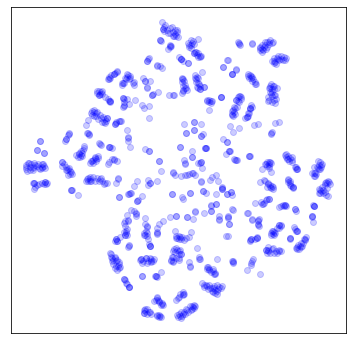

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = 'b', marker='o', alpha=0.2)
#plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y_visit[random_idx], marker='o', alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.show();

# 2. K-means

A possible strategy would be:

- Represent `inertia` to determine the number of cluster
- Analize the number of samples on each cluster and the sum of distances to the centroid.
- For each cluster, `display`  the $n$ closest and the furthest examples from its centroid.
- Analyze the features distribution for each cluster.

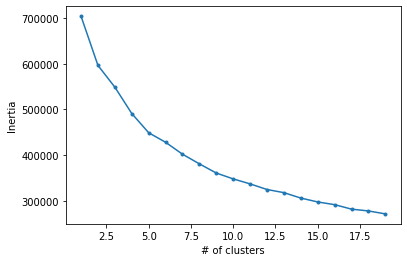

In [9]:
from sklearn.cluster import KMeans

K = range(1,20)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(Xs)
    inertia.append(kmeans.inertia_)
    
plt.plot(K,inertia,'.-')
plt.xlabel('# of clusters')
plt.ylabel('Inertia')
plt.show()

Cluster sizes k-means: [5380 3544 6910 7053 6167 7330 6365 6556 6735 7960]
Cluster distances k-means: [1213938.6, 1117936.75, 1055436.64, 1052900.2, 1069474.94, 1026477.22, 1068005.25, 1046244.21, 1009600.17, 1017250.8]


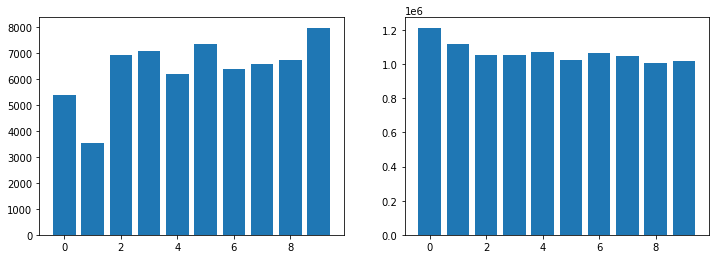

In [10]:
def distance_to_center(X,c):
    return np.sum( np.sum((X - c) ** 2, axis=1) ) 

k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
labels_km = kmeans.fit_predict(Xs)

print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []

for l in np.unique(labels_km):
    d = distance_to_center(Xs,kmeans.cluster_centers_[l])
    distances.append(d.round(2))

print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

In [11]:
def close_to_far_from_center(X,centroid, n=5):
    
    distance = np.sum((X - centroid) ** 2, axis=1)
    
    print('Close to center')
    display(marketing_data_encoded.iloc[np.argsort(distance)[:n]])
    
    print('Far from center')
    display(marketing_data_encoded.iloc[np.argsort(distance)[-n:]])
    

In [12]:
close_to_far_from_center(Xs,kmeans.cluster_centers_[9])

Close to center


,recency,history,mens,womens,newbie,is_suburban,is_urban,phone,web,no_email,womens_email,visit,conversion,spend
2919,6,178.07,1,0,0,0,1,1,0,0,0,0,0,0.0
59834,6,186.96,1,0,0,0,1,1,0,0,0,0,0,0.0
60385,6,189.27,1,0,0,0,1,1,0,0,0,0,0,0.0
4975,6,191.36,1,0,0,0,1,1,0,0,0,0,0,0.0
43827,6,192.50,1,0,0,0,1,1,0,0,0,0,0,0.0


Far from center


,recency,history,mens,womens,newbie,is_suburban,is_urban,phone,web,no_email,womens_email,visit,conversion,spend
27223,7,2816.01,0,1,1,1,0,0,1,0,1,0,0,0.0
43060,1,3003.48,1,1,1,0,1,1,0,1,0,0,0,0.0
52860,1,3040.20,0,1,1,0,1,0,1,0,1,0,0,0.0
38680,1,3215.97,1,1,1,0,1,0,0,0,0,1,0,0.0
4579,2,3345.93,1,1,1,1,0,1,0,1,0,0,0,0.0


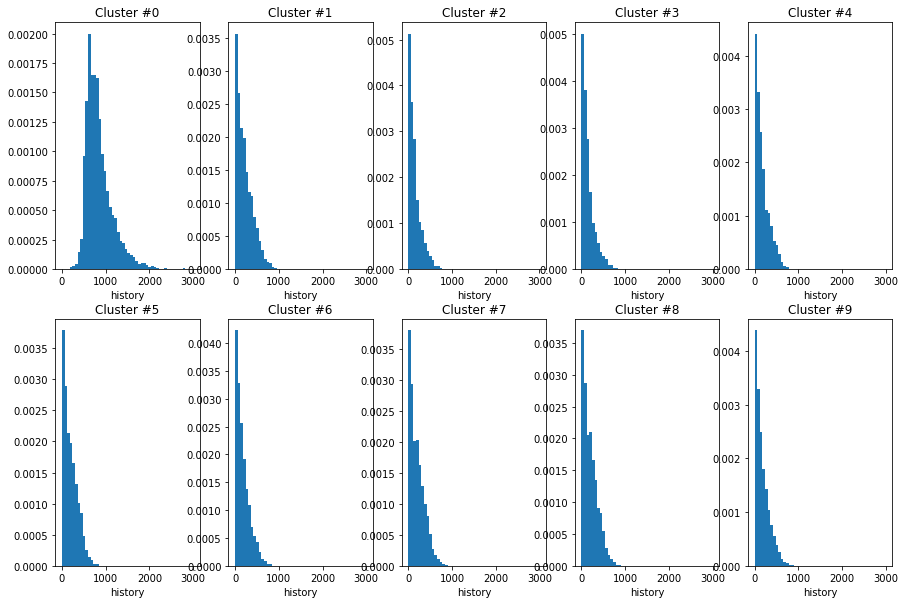

In [13]:
feature = 'history'
plt.figure(figsize=(15,10))
for l in np.unique(labels_km):
    
    plt.subplot(2,5,l+1)
    plt.hist(X.loc[labels_km == l,feature],bins = 50, density=True, range=[0,3000])
    plt.xlabel(feature)
    plt.title('Cluster #' + str(l))

plt.show()

# 3. DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

for eps in [1, 3]:#, 5, 7]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=10)
    labels = dbscan.fit_predict(Xs)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 163
Cluster sizes: [ 346 1024   65  932  878 1019  895  912   74  795  842  237  932   82
  823  984  371  163  263  934 1015  841 1034  323  938  983  788  342
  869  909  307  174  966  177  295  166 1003  956  915  190  875 1021
  849  996  324  242   72  873  863  961  859  870  350  909  939  184
  849  875  223  920  932  916 1050  789  157  819  349   71  181  875
  349  322  144  321  326  188  300  194  162  954  177  277  191  153
  194  298  279  191  215   56   95  133  899  992  824  207  193  197
  140  161  189  141   50   57   40  196   82  240  295  200  339  161
  228  137  366  141  131  102  357  334   88  186  129  183  302  330
   57  203  244  270  151   84  179   76  172  224  174   61  202  169
   53   44   55   47   74   64   43  105  130   57  197   51   79  179
   32   75   86   41   60   29   33   66   43]

eps=3


# Some other examples

- A. Müller and S. Guido, [Comparing Clustering Algorithms in the Faces Dataset](https://github.com/amueller/introduction_to_ml_with_python/blob/master/03-unsupervised-learning.ipynb).

- J. Martínez-Heras, [Clustering Dow Jones stocks](https://github.com/jmartinezheras/2018-MachineLearning-Lectures-ESA/blob/master/5_UnsupervisedLearning/5_Unsupervised_DowJones.ipynb)

- P. Mercatoris, [Hierarchical clustering of Exchange-Traded Funds](https://quantdare.com/hierarchical-clustering-of-etfs/)

- Google Machine Learning Course [Clustering with Manual Similarity Measure](https://developers.google.com/machine-learning/clustering/programming-exercise).